#Business Case: Yulu - Hypothesis Testing

---

---
# Done by Akul Vinod

---

---
https://colab.research.google.com/drive/1JNDt-05x6ruFLWXh7CngPZE8xn4BAEWs?usp=sharing

---
---

#About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

---

# Column Profiling:

datetime: datetime
season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
weather:


1. Clear, Few clouds, partly cloudy, partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


temp: temperature in Celsius

atemp: feeling temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users

registered: count of registered users

count: count of total rental bikes including both casual and registered

---

In [72]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind,f_oneway, levene, kruskal, shapiro, chi2_contingency
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings("ignore")

In [5]:
# converting data into dataframe
yulu = pd.read_csv('bike_sharing.csv')


In [6]:
# making an copy of the dataset
df = yulu.copy()

In [74]:
# Top 5 rows of the dataframe
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,Spring,No,No,1,9.84,14.395,81,0.0,3,13,16,2011,January,1,0
1,2011-01-01 01:00:00,Spring,No,No,1,9.02,13.635,80,0.0,8,32,40,2011,January,1,1
2,2011-01-01 02:00:00,Spring,No,No,1,9.02,13.635,80,0.0,5,27,32,2011,January,1,2
3,2011-01-01 03:00:00,Spring,No,No,1,9.84,14.395,75,0.0,3,10,13,2011,January,1,3
4,2011-01-01 04:00:00,Spring,No,No,1,9.84,14.395,75,0.0,0,1,1,2011,January,1,4


In [8]:
# No of rows and columns
df.shape

(10886, 12)

In [9]:
# Checking of null values
df.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


There are totally 10886 rows and 12 columns in the data

The data does not contain any nulls, thus no need of handling the missing data.


In [10]:
# Duplicate values check
df.duplicated().sum()

np.int64(0)

In [11]:
# skewness of each column
df.skew(numeric_only = True)

,0
season,-0.007076
holiday,5.660517
workingday,-0.776163
weather,1.243484
temp,0.003691
atemp,-0.102560
humidity,-0.086335
windspeed,0.588767
casual,2.495748
registered,1.524805


#Skewness Analysis of Variables
#Symmetrical Majority:
The majority of the variables, including 'season' and 'temp', exhibit skewness values close to zero, suggesting relatively symmetrical distributions.

---
#Positive Skewness Insights:
Variables such as 'holiday', 'weather', 'windspeed', 'casual', 'registered', and 'count' demonstrate positive skewness, pointing to a concentration of lower values and a rightward skew in their distributions.

---

#Negative Skewness Observations:
In contrast, 'workingday', 'atemp', and 'humidity' exhibit negative skewness, implying a concentration of higher values and a leftward skew in their distributions.

---



In [13]:
# Uniques values of each columns
df.nunique()

,0
datetime,10886
season,4
holiday,2
workingday,2
weather,4
temp,49
atemp,60
humidity,89
windspeed,28
casual,309


In [14]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [15]:
# count column is sum of casual and the registered users
(df['casual'] + df['registered'] == df['count']).value_counts()

,count
True,10886


In [17]:
# converting the categorical columns into category
cat_col = ['season', 'holiday', 'workingday', 'weather']
for _ in cat_col:
 df[_] = df[_].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
dtypes: category(4), float64(3), int64(4), object(1)
memory usage: 723.7+ KB


In [18]:
# Converting datetime column into date time format
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime'].dtype

dtype('<M8[ns]')

In [19]:
# Creating new columns from datetime and converting them to categories
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour


In [20]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1


In [21]:
# replacing the number with category
# change of season
df['season'] = df['season'].replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
# change of holiday
df['holiday'] = df['holiday'].replace({0:'No',1:'Yes'})
# change of workingday
df['workingday'] = df['workingday'].replace({0:'No',1:'Yes'})
# change of month
df['month'] = df['month'].replace({1: 'January',
 2: 'February',
3: 'March',
4: 'April',
5: 'May',
6: 'June',
7: 'July',
8: 'August',
9: 'September',
10: 'October',
11: 'November',
12: 'December'})


In [22]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
datetime,10886,2011-12-27 05:56:22.399411968,2011-01-01 00:00:00,2011-07-02 07:15:00,2012-01-01 20:30:00,2012-07-01 12:45:00,2012-12-19 23:00:00,NaN
temp,10886.0,20.23086,0.82,13.94,20.5,26.24,41.0,7.79159
atemp,10886.0,23.655084,0.76,16.665,24.24,31.06,45.455,8.474601
humidity,10886.0,61.88646,0.0,47.0,62.0,77.0,100.0,19.245033
windspeed,10886.0,12.799395,0.0,7.0015,12.998,16.9979,56.9969,8.164537
casual,10886.0,36.021955,0.0,4.0,17.0,49.0,367.0,49.960477
registered,10886.0,155.552177,0.0,36.0,118.0,222.0,886.0,151.039033
count,10886.0,191.574132,1.0,42.0,145.0,284.0,977.0,181.144454
year,10886.0,2011.501929,2011.0,2011.0,2012.0,2012.0,2012.0,0.500019
day,10886.0,9.992559,1.0,5.0,10.0,15.0,19.0,5.476608


In [23]:
df.describe(include = 'category').transpose()

,count,unique,top,freq
season,10886,4,Winter,2734
holiday,10886,2,No,10575
workingday,10886,2,Yes,7412
weather,10886,4,1,7192


#Dataset Overview and Feature Patterns:

This dataset contains information about bike rentals, including timestamps and various numerical features. It covers a period from January 1, 2011, to December 19, 2012.

---

#Key Feature Characteristics:

Numerical Data: Features like temperature, humidity, windspeed, and the counts of casual and registered users show a wide range of values and distributions, indicating how different conditions affect rental numbers.
Temporal Trends: The data reveals patterns based on time, with observations concentrated in 2011 and 2012. There's an average "day" value around 10, and the hourly distribution covers all 24 hours.

---

#Outlier Detection

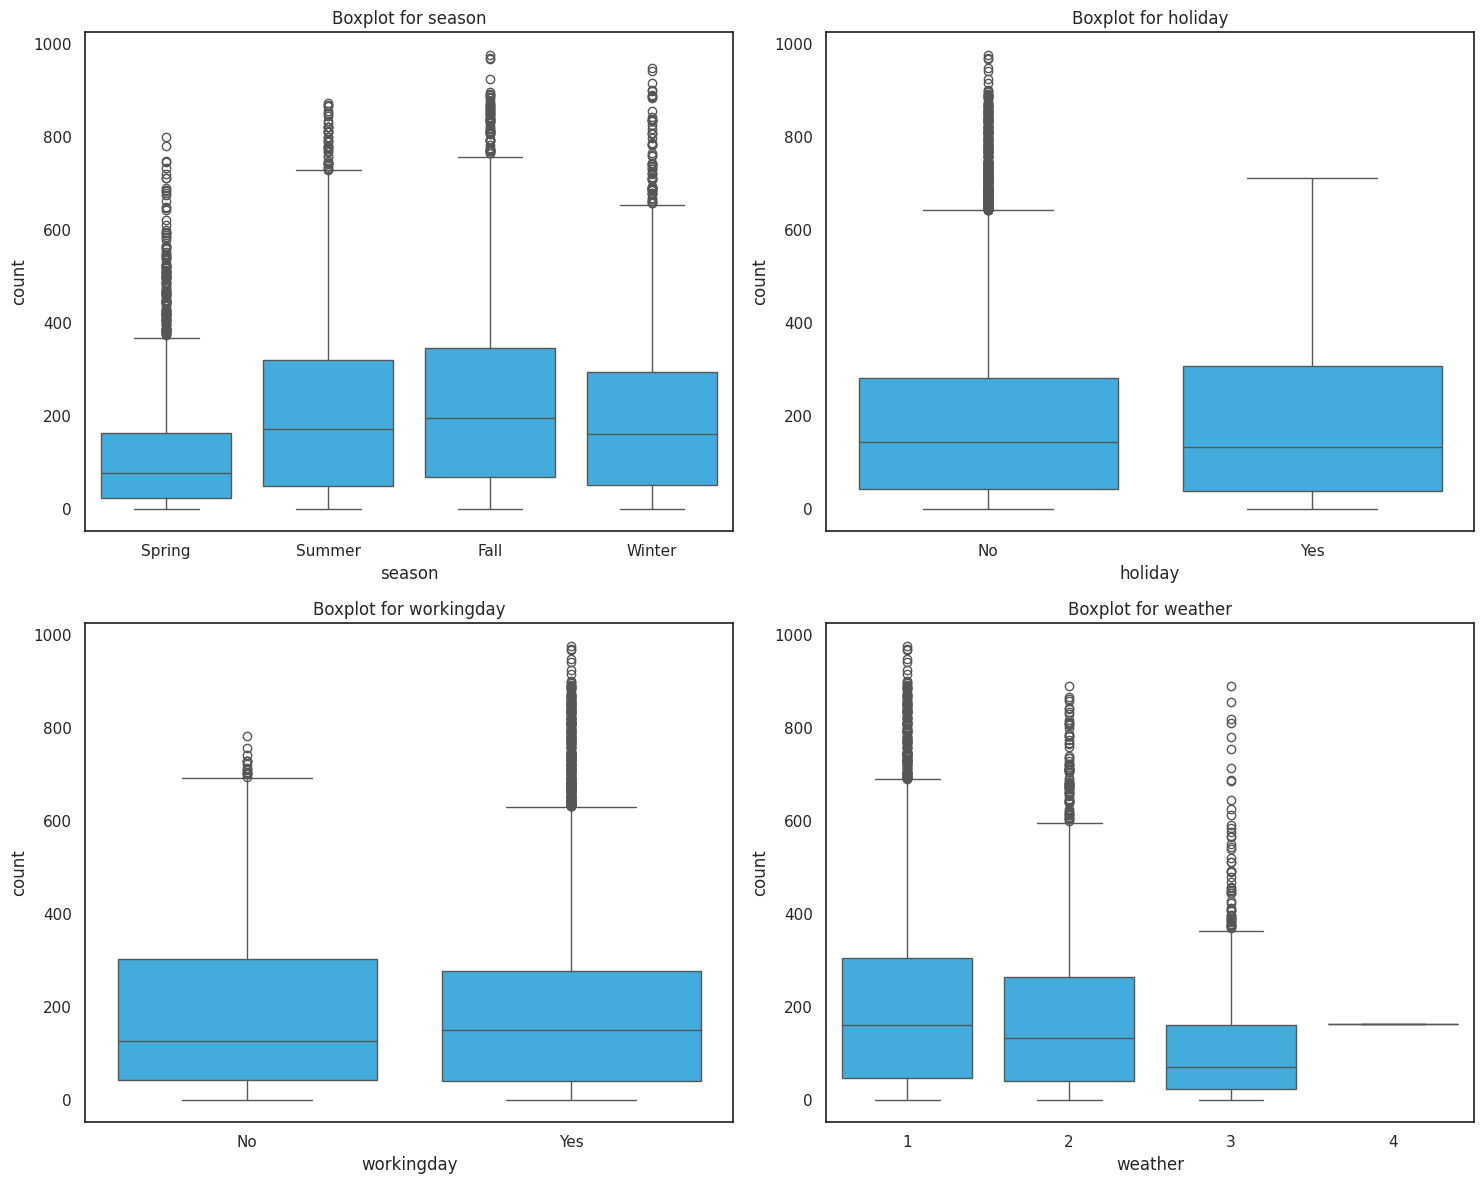

In [24]:
plt.figure(figsize=(15, 12))
sns.set(style="white")
for i, column in enumerate(cat_col,1):
 plt.subplot(2, 2, i)
 sns.boxplot(x=column, y='count', data=df, color="#29B6F6")
 plt.title(f'Boxplot for {column}')
plt.tight_layout()
plt.show()

#Outlier Analysis

#Seasonal Outliers:
The data shows more outliers during spring and winter than in other seasons.

---

#Weather Outliers:
Weather categorized as Category 3 displays numerous outliers, whereas Category 4 weather shows none.

---

#Working Days vs. Holidays:
There are more outliers on regular working days compared to holidays. This indicates unexpected patterns on typical workdays that may warrant further investigation.

---

#Univariate Analysis

In [25]:
# Time span of data
time_span = df['datetime'].max() - df['datetime'].min()
time_span

Timedelta('718 days 23:00:00')

In [26]:
df.columns


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour'],
      dtype='object')

In [27]:
# Season counts
df['season'].value_counts()

,count
season,
Winter,2734
Summer,2733
Fall,2733
Spring,2686


In [28]:
# holiday counts
df['holiday'].value_counts()


,count
holiday,
No,10575
Yes,311


In [29]:
# workingday counts
df['workingday'].value_counts()

,count
workingday,
Yes,7412
No,3474


In [30]:
# weather counts
df['weather'].value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


In [31]:
# year counts
df['year'].value_counts()


,count
year,
2012,5464
2011,5422


In [32]:
# month counts
df['month'].value_counts()

,count
month,
August,912
July,912
June,912
May,912
December,912
October,911
November,911
April,909
September,909


In [33]:
# day counts
df['day'].value_counts().sort_index()

,count
day,
1,575
2,573
3,573
4,574
5,575
6,572
7,574
8,574
9,575


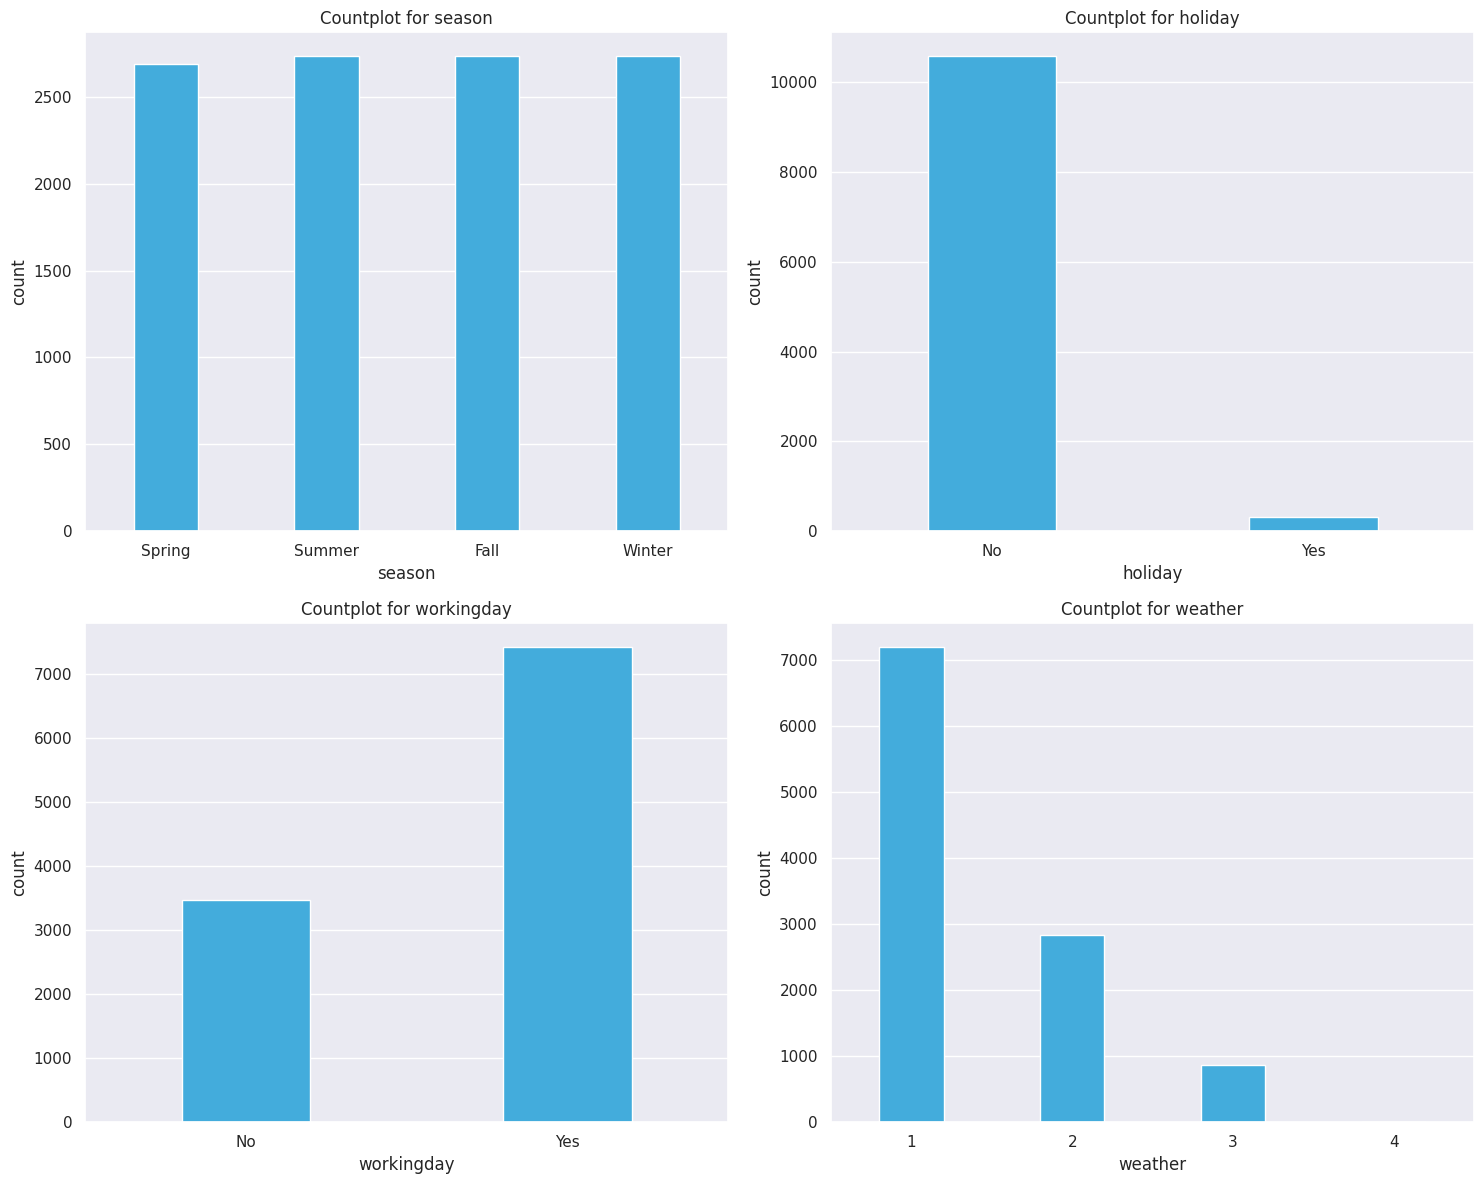

In [34]:
# countplot on categories
plt.figure(figsize=(15, 12))
sns.set(style="darkgrid")
for i, column in enumerate(cat_col, 1):
 plt.subplot(2, 2, i)
 sns.countplot(x=column, data=df, color="#29B6F6", width=0.4)
 plt.title(f'Countplot for {column}')

plt.tight_layout()
plt.show()

In [35]:
# Function for histogram & boxplot on numerical columns
def hist_box(column):
 f, axs = plt.subplots(1, 2, figsize=(10, 5))
 sns.set(style="darkgrid")

 # Histogram
 plt.subplot(1, 2, 1)
 sns.histplot(df[column], bins=20, kde=True)
 plt.title(f'Histogram for {column}')
 # Boxplot
 plt.subplot(1, 2, 2)
 sns.boxplot(df[column], color="#29B6F6")
 plt.title(f'Boxplot for {column}')

 tabular_data = df[column].describe().reset_index()
 tabular_data.columns = ['Statistic', 'Value']
 display(tabular_data)
 plt.tight_layout()
 plt.show()

,Statistic,Value
0,count,10886.00000
1,mean,20.23086
2,std,7.79159
3,min,0.82000
4,25%,13.94000
5,50%,20.50000
6,75%,26.24000
7,max,41.00000


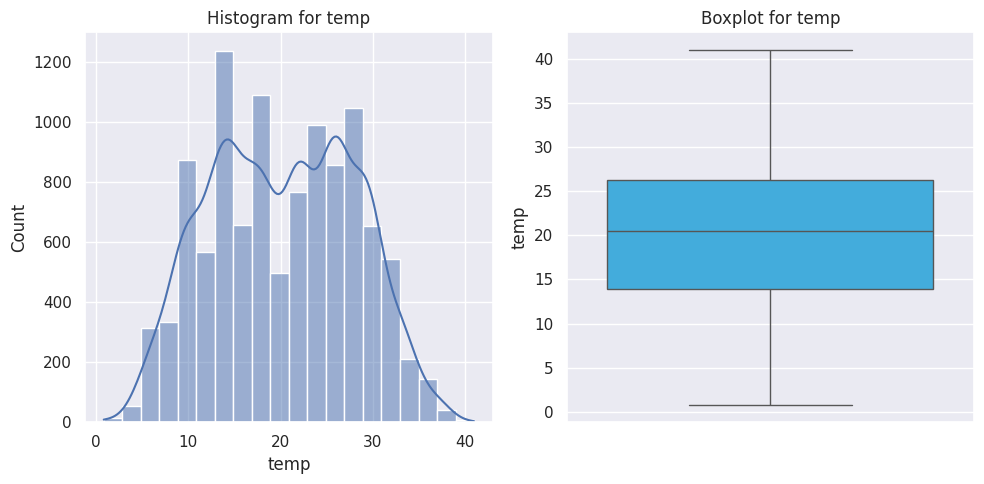

,Statistic,Value
0,count,10886.000000
1,mean,23.655084
2,std,8.474601
3,min,0.760000
4,25%,16.665000
5,50%,24.240000
6,75%,31.060000
7,max,45.455000


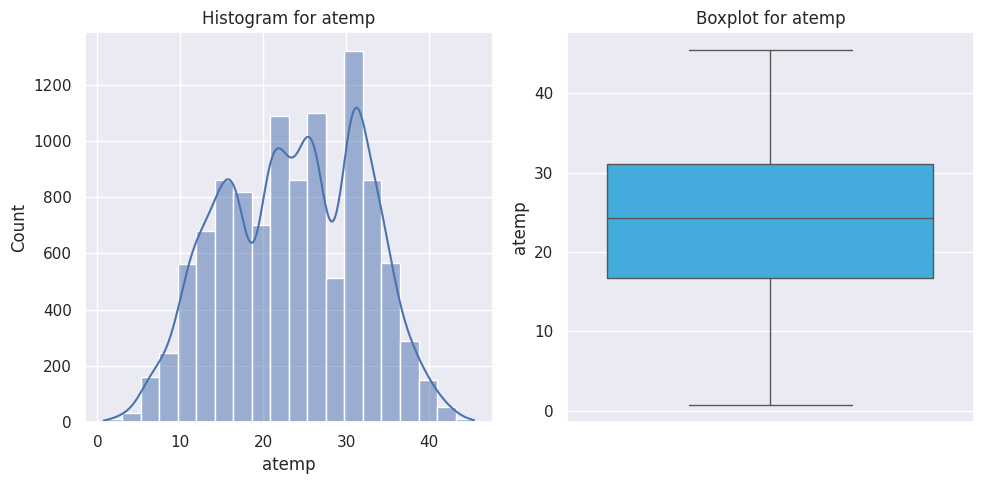

,Statistic,Value
0,count,10886.000000
1,mean,61.886460
2,std,19.245033
3,min,0.000000
4,25%,47.000000
5,50%,62.000000
6,75%,77.000000
7,max,100.000000


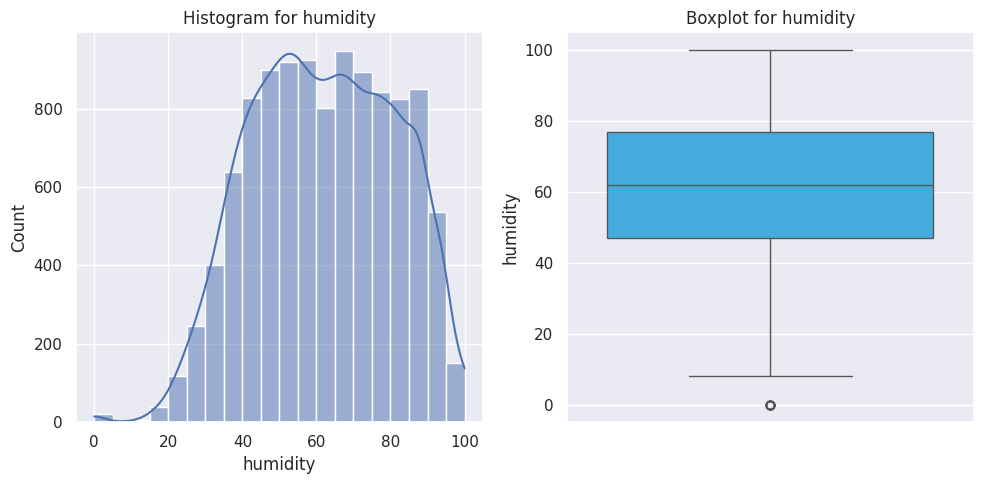

,Statistic,Value
0,count,10886.000000
1,mean,12.799395
2,std,8.164537
3,min,0.000000
4,25%,7.001500
5,50%,12.998000
6,75%,16.997900
7,max,56.996900


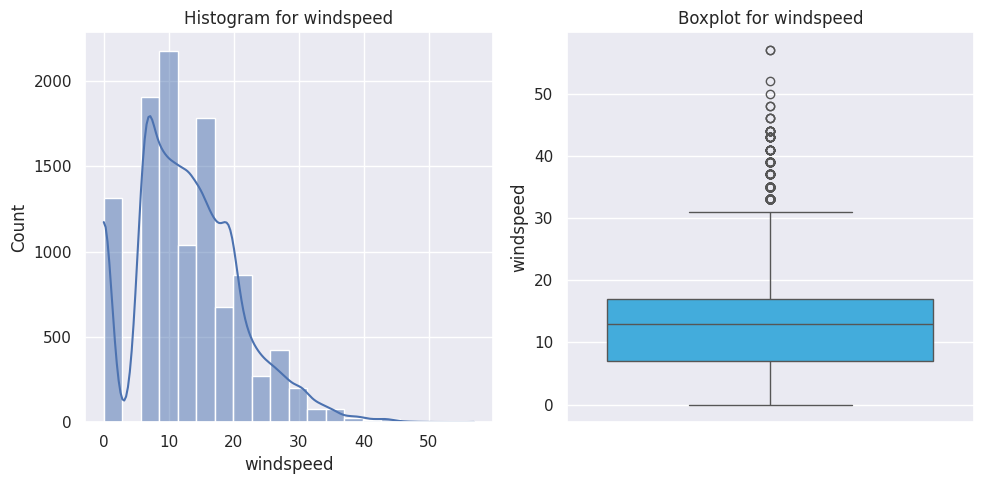

,Statistic,Value
0,count,10886.000000
1,mean,36.021955
2,std,49.960477
3,min,0.000000
4,25%,4.000000
5,50%,17.000000
6,75%,49.000000
7,max,367.000000


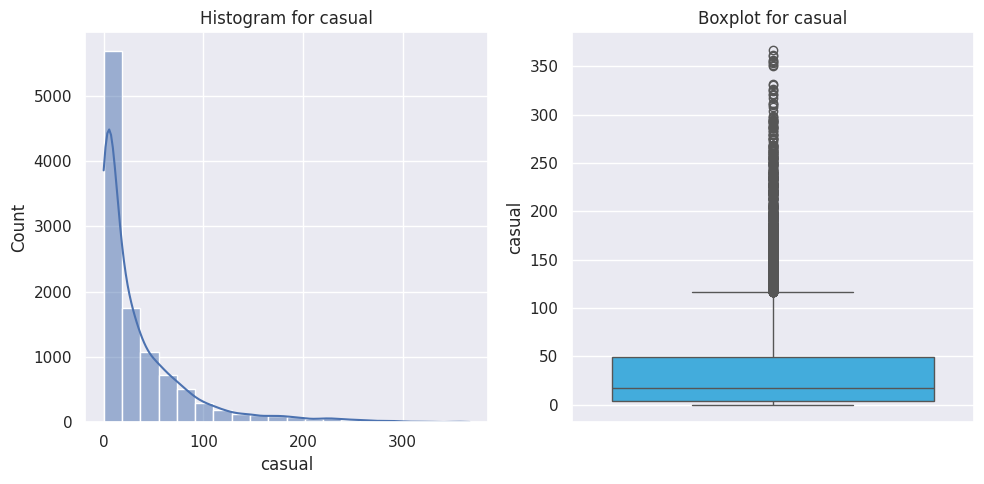

,Statistic,Value
0,count,10886.000000
1,mean,155.552177
2,std,151.039033
3,min,0.000000
4,25%,36.000000
5,50%,118.000000
6,75%,222.000000
7,max,886.000000


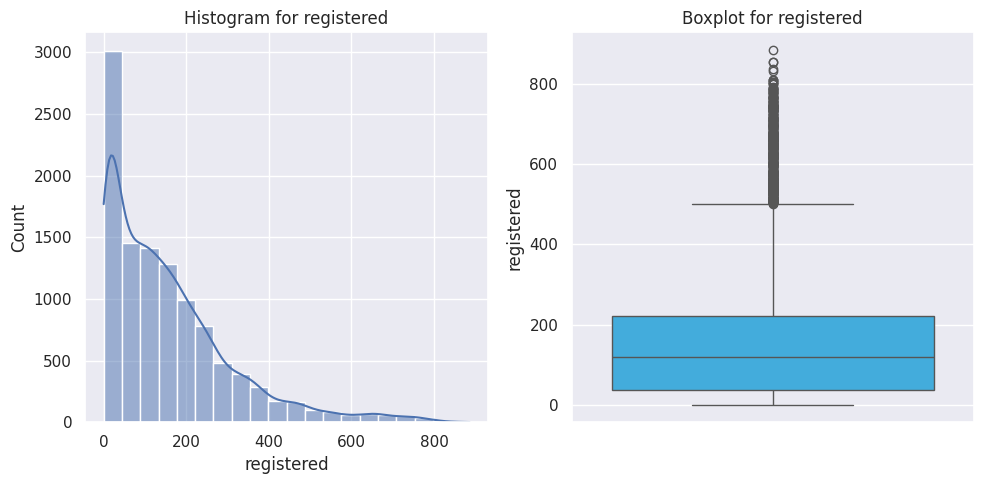

,Statistic,Value
0,count,10886.000000
1,mean,191.574132
2,std,181.144454
3,min,1.000000
4,25%,42.000000
5,50%,145.000000
6,75%,284.000000
7,max,977.000000


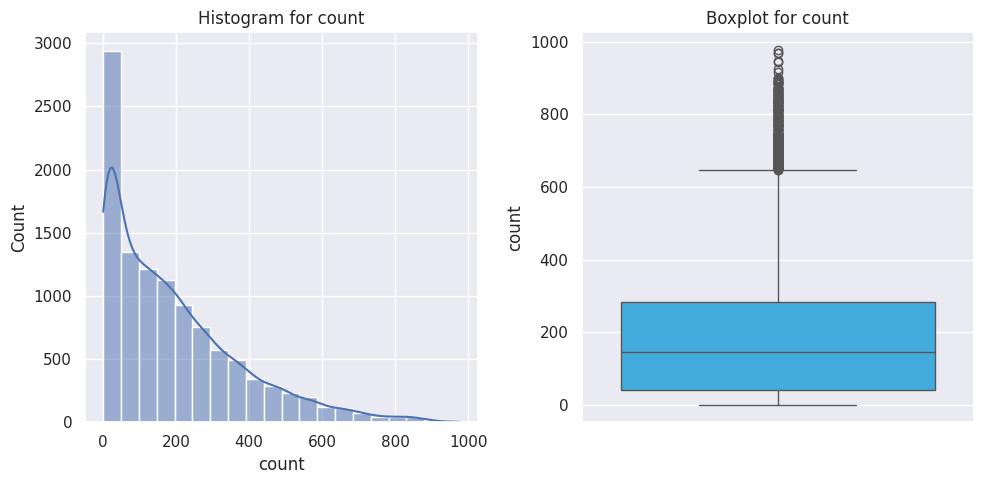

In [38]:
num_col = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']
for column in num_col:
 hist_box(column)

#Temperature (Temp):
The temp column records a wide temperature range, from 0.82°C to 41.0°C, with a median of 20.5°C and a mean of about 20.23°C, indicating moderate variation around the average.

---

#Apparent Temperature (Atemp):
The atemp column shows a broad range of apparent temperatures, from 0.76°C to 45.455°C, with a mean of around 23.66°C and moderate variation around the median of 24.24°C.

---

#Humidity:
Humidity values range from 0% to 100%, with an average of about 61.89%. The distribution shows moderate spread, with the 25th percentile at 47% and the 75th percentile at 77%, reflecting diverse humidity conditions in the dataset.

---

#Wind Speed:
The windspeed column captures wind speeds ranging from 0 to 56.9979, with an average of roughly 12.80, indicating varied wind conditions.

---

#Casual Users:
The casual column represents the number of casual bike rentals, ranging from 0 to 367. The distribution is right-skewed, with a mean of 36.02 and a median of 17.0, suggesting more instances of lower rental counts.

---

#Registered Users:
The registered column highlights the count of registered bike rentals, which varies from 0 to 886. The distribution is positively skewed, with a mean of 155.55 and a median of 118.0, indicating a tendency toward lower counts with occasional higher values.

---

#Total Count:
The count column shows total bike rentals, ranging from 1 to 977. The distribution is also right-skewed, with a mean of 191.57 and a median of 145.0, pointing to a higher frequency of lower rental counts.

---



#Bivariate Analysis

In [39]:
cat_col

['season', 'holiday', 'workingday', 'weather']

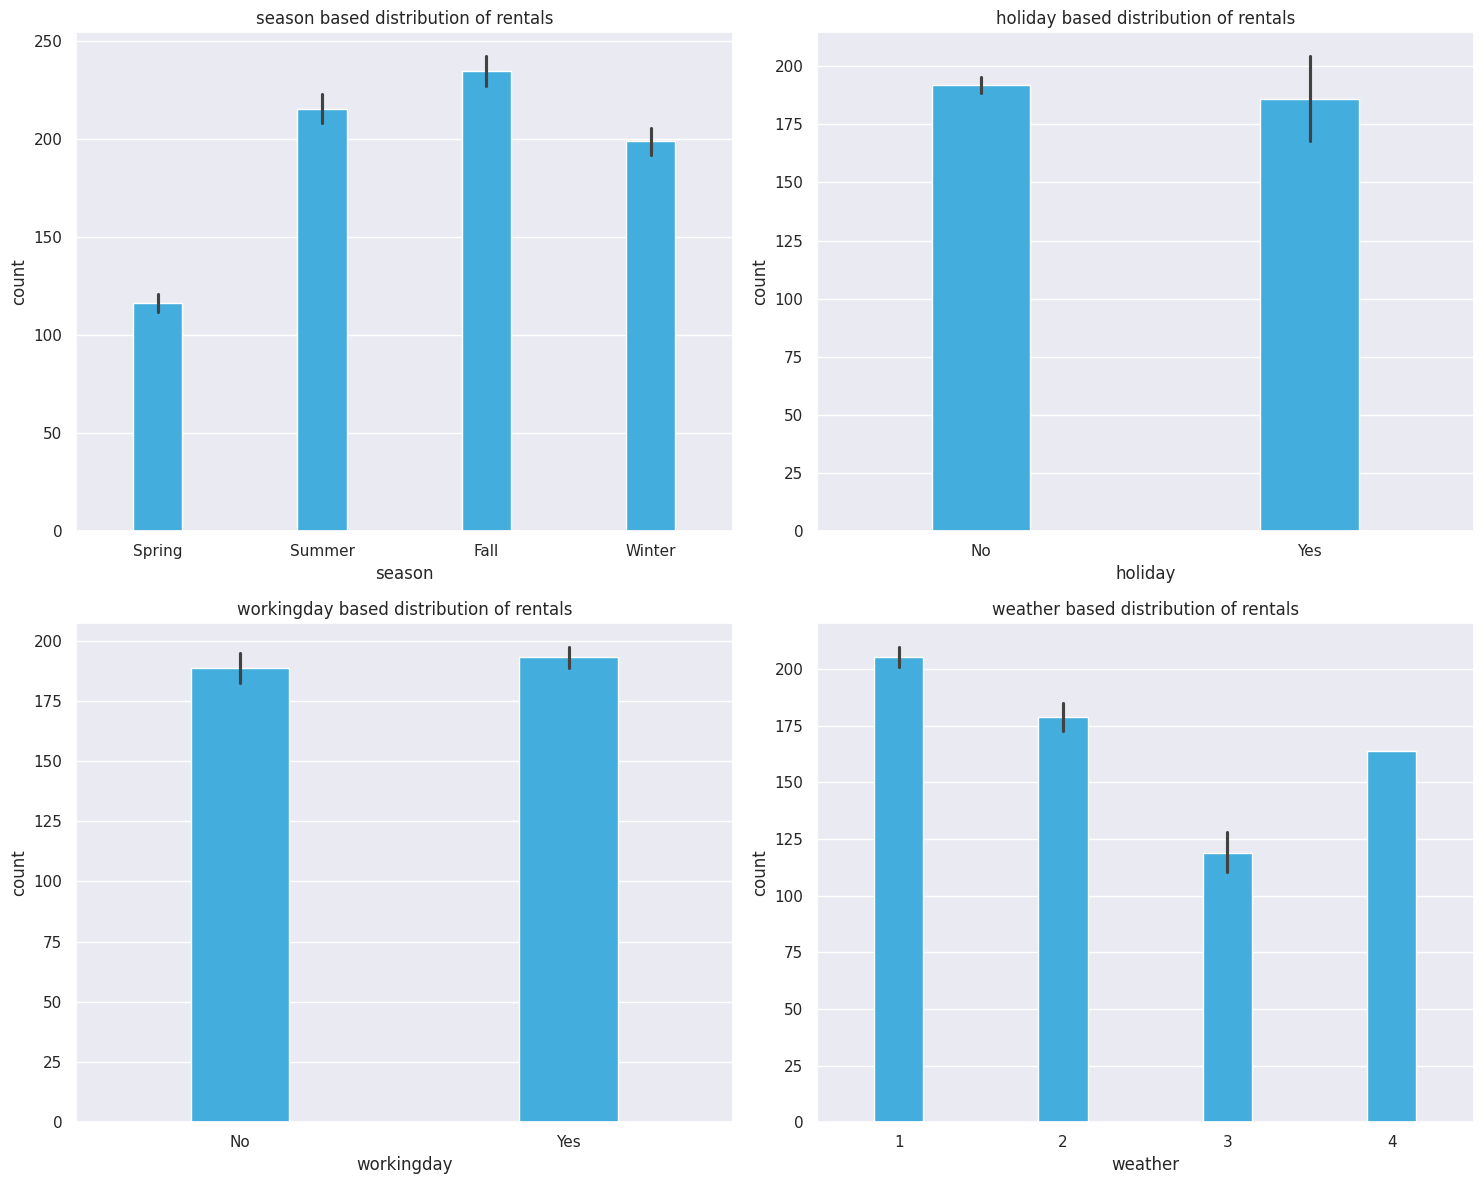

In [40]:
# barplot of categories
plt.figure(figsize=(15, 12))
sns.set(style="darkgrid")
for i, column in enumerate(cat_col,1):
 plt.subplot(2, 2, i)
 sns.barplot(x=column, y='count', data=df, color="#29B6F8", width = 0.3)
 plt.title(f'{column} based distribution of rentals')

plt.tight_layout()
plt.show()


In [44]:
# corrrelation analysis
correlation_cols = ['atemp', 'temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
correlation_matrix = correlation_df[correlation_cols].corr()
correlation_matrix

,atemp,temp,humidity,windspeed,casual,registered,count
atemp,1.000000,0.984948,-0.043536,-0.057473,0.462067,0.314635,0.389784
temp,0.984948,1.000000,-0.064949,-0.017852,0.467097,0.318571,0.394454
humidity,-0.043536,-0.064949,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.057473,-0.017852,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.462067,0.467097,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.314635,0.318571,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.389784,0.394454,-0.317371,0.101369,0.690414,0.970948,1.000000


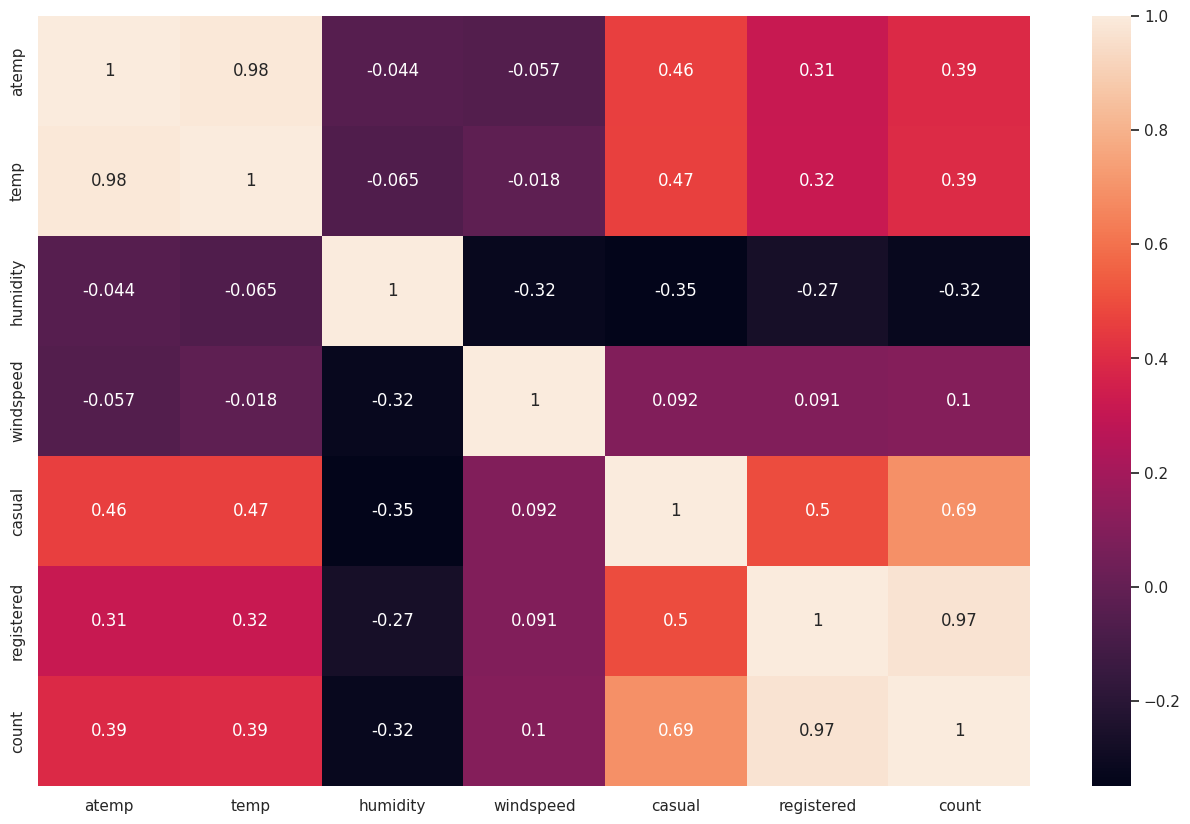

In [45]:
# correlation chart
plt.figure(figsize = (16, 10))
sns.heatmap(correlation_matrix, annot = True)
plt.show()

##  **Correlation Analysis**

---

### Apparent Temperature (Atemp)

* Strong positive correlation with **Temp** *(0.98)* → indicates a very close relationship.
* Moderately positive correlation with **Casual** *(0.46)* and **Registered** *(0.31)* rentals.
* Positive correlation with **Count** *(0.39)* → suggests a link with total bike rentals.

---

###  Temperature (Temp)

* Highly correlated with **Atemp** *(0.98)* → strong connection.
* Moderately positive correlation with **Casual** *(0.47)* and **Registered** *(0.32)* rentals.
* Positive correlation with **Count** *(0.39)* → shows a relationship with overall rentals.

---

###  Humidity

* Weak negative correlation with **Atemp** *(-0.04)* and **Temp** *(-0.06)*.
* Moderate negative correlation with **Casual** *(-0.35)*, **Registered** *(-0.27)*, and **Count** *(-0.32)*.
* Indicates fewer bike rentals during periods of high humidity.

---

###  Windspeed

* Weak negative correlation with **Atemp** *(-0.06)* and **Temp** *(-0.02)*.
* Weak positive correlation with **Casual** *(0.09)*, **Registered** *(0.09)*, and **Count** *(0.10)*.
* Suggests wind speed has a slight influence on rentals.

---

###  Casual Rentals

* Strong positive correlation with **Atemp** *(0.46)* and **Temp** *(0.47)*.
* Moderate negative correlation with **Humidity** *(-0.35)*.
* Slight positive correlation with **Windspeed** *(0.09)*.
* Strongly correlated with **Registered** *(0.50)* and **Count** *(0.69)* → significant impact on total rentals.

---

###  Registered Rentals

* Positive correlation with **Atemp** *(0.31)* and **Temp** *(0.32)*.
* Negative correlation with **Humidity** *(-0.27)*.
* Slight positive correlation with **Windspeed** *(0.09)*.
* Strongly correlated with **Casual** *(0.50)* and **Count** *(0.97)* → major contributor to total rentals.

---

###  Total Count

* Positive correlation with **Atemp** *(0.39)*, **Temp** *(0.39)*, and **Casual** *(0.69)*.
* Negative correlation with **Humidity** *(-0.32)*.
* Very strong correlation with **Registered** *(0.97)* → highlights the combined effect of casual and registered rentals on total counts.

---

 **Insight:**
Higher temperatures and apparent temperatures tend to increase bike rentals, while higher humidity reduces them. Wind speed has only a minor effect.

---



In [46]:
# counts based on months
monthly_count = df.groupby('month')['count'].sum().reset_index()
monthly_count = monthly_count.sort_values(by='count', ascending=False)
monthly_count

,month,count
6,June,220733
5,July,214617
1,August,213516
11,September,212529
10,October,207434
8,May,200147
9,November,176440
0,April,167402
2,December,160160
7,March,133501


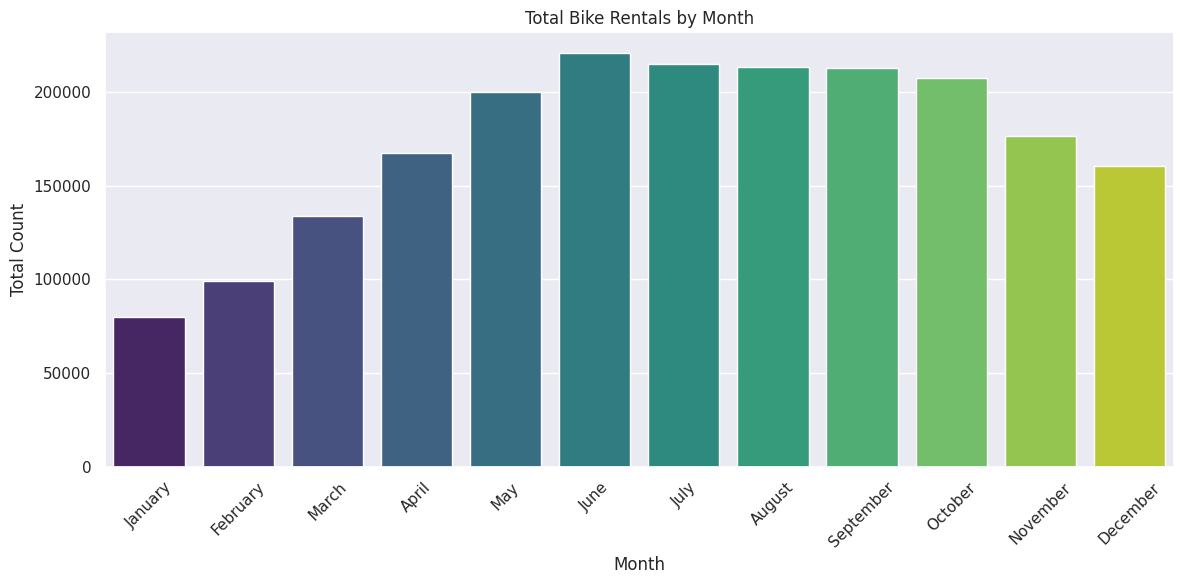

Total Count by Month:


,month,count
4,January,79884
3,February,99113
7,March,133501
0,April,167402
8,May,200147
6,June,220733
5,July,214617
1,August,213516
11,September,212529
10,October,207434


In [48]:
# prompt: Total Count by month by Total Count

monthly_count = df.groupby('month')['count'].sum().reset_index()
# Sort the months in chronological order for better visualization
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_count['month'] = pd.Categorical(monthly_count['month'], categories=month_order, ordered=True)
monthly_count = monthly_count.sort_values(by='month')

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='count', data=monthly_count, palette='viridis')
plt.title('Total Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Total Count by Month:")
monthly_count


#  Monthly Analysis on Bike Rentals

---

# Peak Rental Months:
June records the highest number of bike rentals at 220,733, with July and August also showing high rental volumes.

---

# Seasonal Trend:
The summer months (June, July, and August) consistently see increased bike rentals, likely due to favorable weather conditions.

---

# Off-Peak Months:
Rental counts drop significantly in January, February, and March, suggesting off-peak periods influenced by colder weather and reduced outdoor activities.

---



#  Hypothesis Testing

---

# Hypothesis:
The demand for bicycle rentals is the same on weekdays and weekends.

---

 # Test Selection:
Since we have two independent samples (weekdays vs. weekends), we will use a Two-Sample Independent T-Test.

---

# Assumptions for the Two-Sample Independent T-Test:

1. The data should be normally distributed.

2. The variances of the two groups should be equal.

We will use a 95% confidence interval, so the significance level (α) is 0.05.

---

# Checking Normality:
To check if the data is normally distributed, we will use the Shapiro-Wilk Test.

1. Null Hypothesis (H₀): The data is normally distributed.

2. Alternative Hypothesis (H₁): The data is not normally distributed.

---


In [49]:
np.random.seed(41)
df_subset = df.sample(100)["count"]
test_stat, p_val = shapiro(df_subset)
p_val

np.float64(2.6341210395843134e-07)

Hence the p_values is lesser than the significance level, Null hypothesis can be rejected.
* Therefore, the Data is not normally distributed.

# QQ Plot analysis


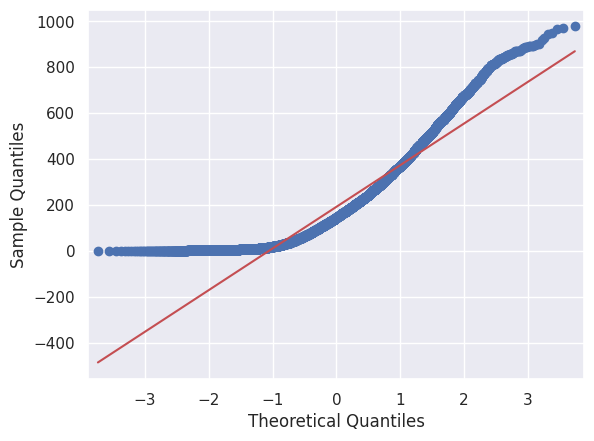

In [50]:
# QQ plot
qqplot(df['count'], line = 's')
plt.show()


#Checking Equality of Variances:
To test whether the variances of the two groups are equal, we will use Levene’s Test.

1. Null Hypothesis (H₀): The variances of the two groups are equal.

2. Alternative Hypothesis (H₁): The variances of the two groups are not equal.

In [51]:
working_day = df[df['workingday'] == 'Yes']['count']
holiday = df[df['workingday'] == 'No']['count']
levene_stat, p_val = levene(working_day, holiday)
p_val

np.float64(0.9437823280916695)

<Axes: xlabel='count', ylabel='Density'>

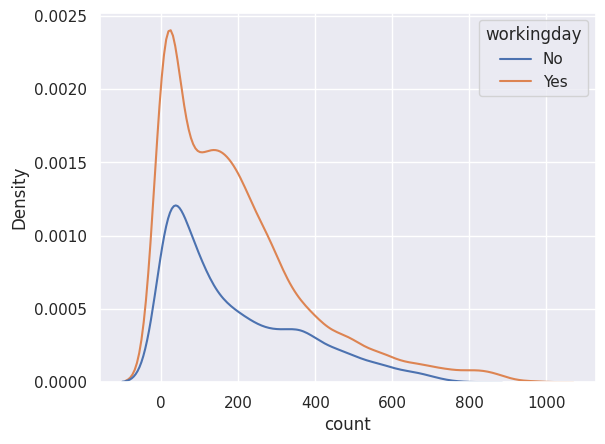

In [52]:
sns.kdeplot(data = df, x = 'count', hue = 'workingday')


<Axes: xlabel='count', ylabel='Count'>

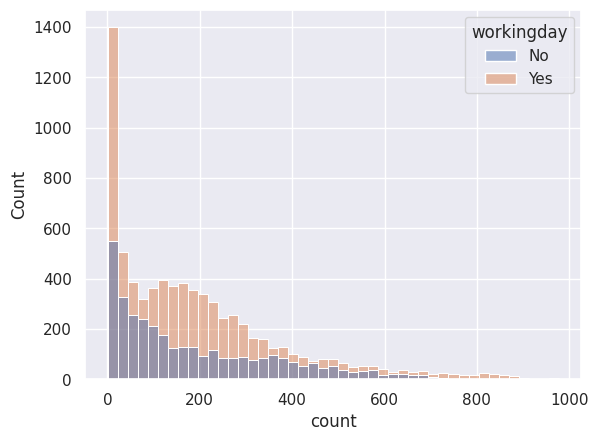

In [53]:
sns.histplot(data = df, x = 'count', hue = 'workingday')

#  Conclusion on Variance and Normality:
Since the p-value is greater than the significance level (α = 0.05), we fail to reject the null hypothesis for Levene’s Test.
Therefore, the variances of the two groups are approximately equal.

However, the data is not normally distributed, as indicated by both the Shapiro-Wilk Test and the QQ plot.
Despite this, it’s important to note that the equality of variances holds.

#  Proceeding with the Two-Sample Independent T-Test:
Given that the variances are equal, we can proceed with the Two-Sample Independent T-Test.

1. Null Hypothesis (H₀): There is no significant difference in bike rental demand between working days and non-working days.

2. Alternative Hypothesis (H₁): There is a significant difference in bike rental demand between working days and non-working days.

In [54]:
ttest_stat, p_val = ttest_ind(working_day, holiday)
p_val

np.float64(0.22644804226361348)

#Conclusion:
Since the p-value is greater than the significance level (α = 0.05), we fail to reject the null hypothesis.
* Therefore, there is no significant difference in bike rental demand between working days and non-working days.

---

In [55]:
kruskal_stat, p_val = kruskal(working_day, holiday)
p_val

np.float64(0.9679113872727798)

#Conclusion:
Since the p-value is greater than the significance level, we fail to reject the null hypothesis.
* Therefore, there is no significant difference in bike rentals between working days and non-working days.

---

# Hypothesis Testing for Weather Conditions
# Hypothesis:
The demand for bicycle rentals is the same across different weather conditions.

---

# Test Selection:
Since there are more than two categories, we will use ANOVA (Analysis of Variance) to test this hypothesis.

---

# Assumptions for ANOVA:

1. Normality: The data should be normally distributed — however, this condition is not met, as confirmed by the Shapiro-Wilk Test and QQ plot.

2. Independence: The data points must be independent — this condition is satisfied.

3. Equal Variance: The variances within the groups should be approximately equal — this will be tested using Levene’s Test.

---

In [56]:
# skewness of weather
df.groupby('weather')['count'].skew()

,count
weather,
1,1.139857
2,1.294444
3,2.187137
4,NaN


In [57]:
# kurtosis test of weather
df.groupby('weather')['count'].apply(lambda x: x.kurtosis())


,count
weather,
1,0.964720
2,1.588430
3,6.003054
4,NaN


<Axes: xlabel='count', ylabel='Density'>

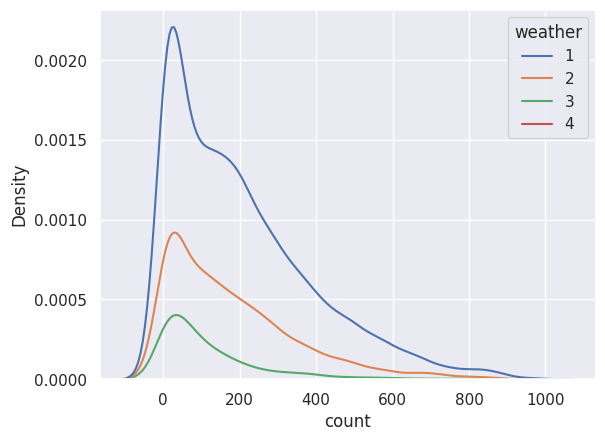

In [58]:
sns.kdeplot(data = df, x = 'count', hue = 'weather')

<Axes: xlabel='count', ylabel='Count'>

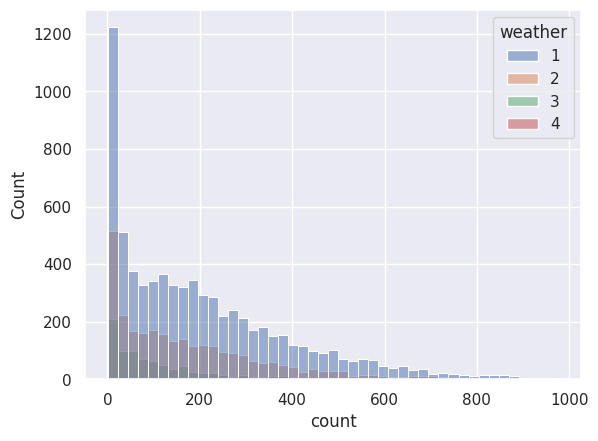

In [59]:
sns.histplot(data = df, x = 'count', hue = 'weather')

The Test hypothesis for Levene's test are:
1. Ho: The variances are equal.
2. Ha: The variances are not equal.


In [60]:
weather1 = df[df['weather'] == 1]['count']
weather2 = df[df['weather'] == 2]['count']
weather3 = df[df['weather'] == 3]['count']
weather4 = df[df['weather'] == 4]['count']
levene_stat, p_val = levene(weather1, weather2, weather3,weather4)
p_val

np.float64(3.504937946833238e-35)

#  Variance Test Conclusion:
Since the p-value is smaller than the significance level (α = 0.05), we reject the null hypothesis for Levene’s Test.
Therefore, the variances are not equal across weather conditions.

---

#  ANOVA Assumptions:
Two out of the three ANOVA assumptions (normality and equal variance) are not met.
Despite this, we will still perform ANOVA to compare results.

Additionally, we will perform the Kruskal-Wallis Test, which is a non-parametric alternative that does not assume normality or equal variances.

If there is any discrepancy between the ANOVA and Kruskal-Wallis results, the Kruskal-Wallis Test outcome will be considered more reliable for this dataset.

---

#  Hypotheses for ANOVA:

1. Null Hypothesis (H₀): There is no significant difference in bicycle rental demand across different weather conditions.

2. Alternative Hypothesis (H₁): There is a significant difference in bicycle rental demand across different weather conditions.

---

In [61]:
anova_stat, p_val = f_oneway(weather1, weather2, weather3,weather4)
p_val

np.float64(5.482069475935669e-42)

Hence the p_values is smaller than the significance level, Null hypothesis can be rejected.
* Therefore, There is a significant difference between demand of bicycles for different
Weather conditions.


# Kruskal Test on weather


In [62]:
kruskal_stat, p_val = kruskal(weather1, weather2, weather3,weather4)
p_val

np.float64(3.501611300708679e-44)

#  ANOVA Result for Weather Conditions:
Since the p-value is smaller than the significance level (α = 0.05), we reject the null hypothesis.
Therefore, we conclude that there is a significant difference in bicycle rental demand across different weather conditions.

---

#  Hypothesis Testing for Seasons
#  Hypothesis:
The demand for bicycle rentals is the same across different seasons.

---

#  Test Selection:
As there are more than two categories, we will use ANOVA to test this hypothesis as well.

---

#  Assumptions for ANOVA:

Normality: The data should be normally distributed — however, this condition is not met, as confirmed by the Shapiro-Wilk Test and QQ plot.

Independence: The data points must be independent — this condition is satisfied.

---

In [63]:
# skewness of seasons
df.groupby('season')['count'].skew()


,count
season,
Spring,1.888056
Summer,1.003264
Fall,0.991495
Winter,1.172117


In [64]:
# kurtosis test of seasons
df.groupby('weather')['count'].apply(lambda x: x.kurtosis())

,count
weather,
1,0.964720
2,1.588430
3,6.003054
4,NaN


<Axes: xlabel='count', ylabel='Density'>

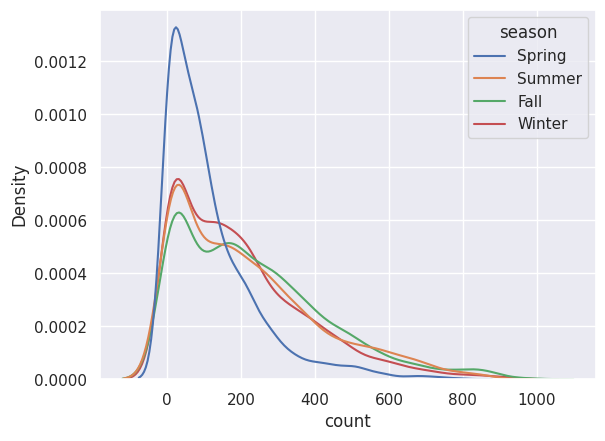

In [65]:
sns.kdeplot(data = df, x = 'count', hue = 'season')

<Axes: xlabel='count', ylabel='Count'>

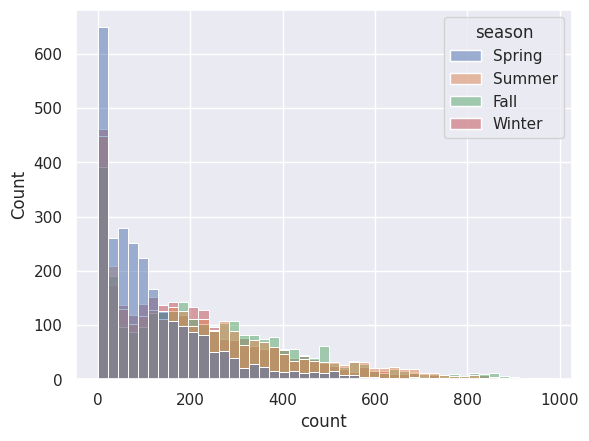

In [66]:
sns.histplot(data = df, x = 'count', hue = 'season')


The Test hypothesis for Levene's test are:
1. Ho: The variances are equal.
2. Ha: The variances are not equal.

In [67]:
spring = df[df['season'] == 'Spring']['count']
summer = df[df['season'] == 'Summer']['count']
fall = df[df['season'] == 'Fall']['count']
winter = df[df['season'] == 'Winter']['count']
levene_stat, p_val = levene(spring,summer,fall,winter)
p_val

np.float64(1.0147116860043298e-118)

#  Variance Test Conclusion for Seasons:
Since the p-value is smaller than the significance level (α = 0.05), we reject the null hypothesis for Levene’s Test.
Therefore, the variances are not equal across different seasons.

---

#  ANOVA Assumptions:
As before, because normality and equal variances assumptions are not met, we will still perform ANOVA but also run the Kruskal-Wallis Test as a robust non-parametric alternative.

If there is any difference in the results, we will rely on the Kruskal-Wallis Test, since the data does not fully meet ANOVA’s assumptions.

---

#  Hypotheses for ANOVA (Seasons):

Null Hypothesis (H₀): There is no significant difference in bicycle rental demand across different seasons.

Alternative Hypothesis (H₁): There is a significant difference in bicycle rental demand across different seasons.

---



In [68]:
anova_stat, p_val = f_oneway(spring ,summer, fall, winter)
p_val

np.float64(6.164843386499654e-149)

Hence the p_values is smaller than the significance level, Null hypothesis can be rejected.
* Therefore, There is a significant difference between demand of bicycles for different
Seasons.


# Kruskal Test on season

In [69]:
kruskal_stat, p_val = kruskal(spring ,summer, fall, winter)
p_val

np.float64(2.479008372608633e-151)

#  ANOVA/Kruskal-Wallis Result for Seasons:
Since the p-value is smaller than the significance level (α = 0.05), we reject the null hypothesis.
Therefore, we conclude that there is a significant difference in bicycle rental demand across different seasons.

---

# Analysis of Weather Conditions Across Seasons — Chi-Square Test

---
# Hypotheses for the Chi-Square Test:

Null Hypothesis (H₀): Season and Weather Condition are independent of each other.

Alternative Hypothesis (H₁): Season and Weather Condition are dependent on each other.


---

In [70]:
contingency_table = pd.crosstab(df['weather'], df['season'])
contingency_table


season,Spring,Summer,Fall,Winter
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [73]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=np.float64(49.15865559689363), pvalue=np.float64(1.5499250736864862e-07), dof=9, expected_freq=array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
       [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
       [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
       [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]]))

Chi-Square Test Conclusion:
Since the p-value (1.55 × 10⁻⁷) is smaller than the significance level (α = 0.05), we reject the null hypothesis.
* Therefore, we conclude that season and weather conditions are dependent on each other.

# Strategic Recommendations for Yulu’s Profitable Growth

---
# Optimize Bike Distribution in Peak Months
Deploy more bikes during peak demand months — especially June, July, and August — to meet higher usage and maximize revenue during favorable weather.

---

# Seasonal Marketing Campaigns
Strengthen marketing efforts in the summer months by promoting special offers or campaigns to attract more riders when demand is naturally higher.

---

# Boost Engagement in Off-Peak Months
Run targeted promotions or discounts during off-peak periods (January–March) to maintain steady rental activity and revenue flow during slower months.

---

# Weather-Responsive Pricing
Adopt dynamic pricing that adjusts rental rates based on weather conditions — for example, offering discounts during rainy or extreme weather days to encourage usage.

---

# Diversify Revenue Streams
Expand revenue opportunities through partnerships, sponsorships, or premium memberships with added perks, helping reduce dependency on rentals alone.

---

# Enhance User Experience
Invest in app improvements, regular bike maintenance, and excellent customer support to build user loyalty and encourage repeat rentals.

---

# Optimize Deployment for Working Days
Since rental demand is similar on working and non-working days, adjust bike deployment for balanced availability throughout the entire week.

---

# Adapt Promotions to Weather Changes
Offer weather-based deals — for example, special discounts on rainy days — to keep demand stable regardless of weather fluctuations.

---

# Season-Specific Campaigns
Customize advertising to highlight what appeals most in each season — such as promoting outdoor summer rides and eco-friendly travel during peak months.

---

# Integrate Seasonal & Weather Plans
Align bike availability with both seasonal trends and daily weather forecasts — for instance, ensure more bikes are ready on clear, warm days to meet higher demand.

---